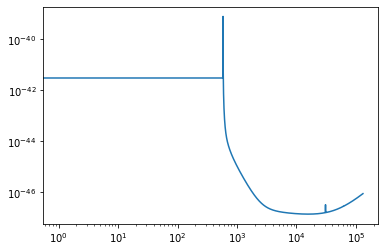

In [4]:
# Program to read PSD from file
# Last modification 2018 May 23

import numpy as np
from matplotlib import pyplot as plt

#-----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------#
def get_ind(gmin, gmax, delta):
    """
    Parameters
    ----------
    gmin:int/float
        Lower bound value
    gmax:int/float
        Upper bound value
    delta: int/float
        Resolution/ Step Size

    Returns
    -------
    Ind_min: int
        Lower bound value index
    Ind_max: int
        Upper bound value index
    """

    Ind_min    = int(1.0*gmin/delta)
    Ind_max    = int(1.0*gmax/delta)
    return Ind_min, Ind_max

#-----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------#
def frequency_series(fs,df):
    """
    Frequency Series based on the given frequency resolution and sampling frequency.

    Parameters
    ----------
    fs: float
        Sampling frequency
    df: float
        frequency resolution

    Returns
    -------
    freaxisP : numpy ndarray
        frequency series from 0 to fs/2 Hz in numpy ndarray (Zero - excluded)
    freaxisN : numpy ndarray
        frequency series from -fs/2 to fs/2 Hz in numpy ndarray)
    """
    # df to fs/2.
    freaxisP        = np.arange(0,(fs/2.)+df,df)
    # -fs/2. to fs/2.
    freaxisN        = np.arange(-fs/2,fs/2,df)

    return freaxisP,freaxisN


#-----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------#
def detector_psd(frequency_positive,filename,f_low,f_high, df):
    """
    Power Spectral Density of the detector

    Parameters
    ----------
    frequency_positive: numpy ndarray
        Power Spectral Density for positive frequency range

    filename: string
        Path and name of detector psd file
    f_low: int/float
        Lower bound value in the series
    f_high: int/float
        Upper bound vlaue in the series
    df: int/float
        Difference between the two values in the series(Steps in the series)

    Returns
    -------
    psd_positive: numpy ndarray
        Advance LIGO Power Spectral Density in the positive frequency range
    psd_range: numpy ndarray
        Advance LIGO Power Spectral Density in the desired frequency range

    """
    Imin,Imax       = get_ind(f_low, f_high, df)

    asdfile         = np.loadtxt(filename)
    asd_range       = np.interp(frequency_positive[Imin:Imax],asdfile[:,0],asdfile[:,1])
    psd_range       = asd_range**2
    asd_positive    = np.interp(frequency_positive,asdfile[:,0],asdfile[:,1])
    psd_positive    = asd_positive**2

    return psd_positive,psd_range

#-----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------#

flow        = 40
fhigh       = 2048
deltaF      = 1./64
samplingFre = 4096
#Fname       = '/home/gar/Gar_prog/python_present/py_chi/x2/ZERO_DET_high_P.txt'
Fname       = 'ZERO_DET_high_P.txt'


Pfre,_              = frequency_series(samplingFre,deltaF)
psd_pos, psd_range  = detector_psd(Pfre,Fname,flow,fhigh,deltaF)

plt.loglog(psd_pos)
plt.show()

#-----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------#



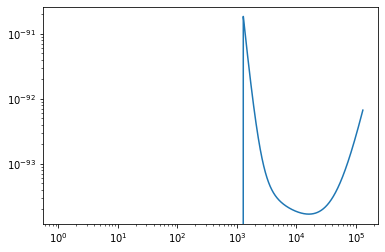

In [7]:
# Program to read PSD from file
# Last modification 2018 May 23

import numpy as np
from matplotlib import pyplot as plt

#-----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------#
def get_ind(gmin, gmax, delta):
    """
    Parameters
    ----------
    gmin:int/float
        Lower bound value
    gmax:int/float
        Upper bound value
    delta: int/float
        Resolution/ Step Size

    Returns
    -------
    Ind_min: int
        Lower bound value index
    Ind_max: int
        Upper bound value index
    """

    Ind_min    = int(1.0*gmin/delta)
    Ind_max    = int(1.0*gmax/delta)
    return Ind_min, Ind_max

#-----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------#
def frequency_series(fs,df):
    """
    Frequency Series based on the given frequency resolution and sampling frequency.

    Parameters
    ----------
    fs: float
        Sampling frequency
    df: float
        frequency resolution

    Returns
    -------
    freaxisP : numpy ndarray
        frequency series from 0 to fs/2 Hz in numpy ndarray (Zero - excluded)
    freaxisN : numpy ndarray
        frequency series from -fs/2 to fs/2 Hz in numpy ndarray)
    """
    # df to fs/2.
    freaxisP        = np.arange(0,(fs/2.)+df,df)
    # -fs/2. to fs/2.
    freaxisN        = np.arange(-fs/2,fs/2,df)

    return freaxisP,freaxisN


#-----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------#
def detector_psd(frequency_positive,filename,f_low,f_high, df):
    """
    Power Spectral Density of the detector

    Parameters
    ----------
    frequency_positive: numpy ndarray
        Power Spectral Density for positive frequency range

    filename: string
        Path and name of detector psd file
    f_low: int/float
        Lower bound value in the series
    f_high: int/float
        Upper bound vlaue in the series
    df: int/float
        Difference between the two values in the series(Steps in the series)

    Returns
    -------
    psd_positive: numpy ndarray
        Advance LIGO Power Spectral Density in the positive frequency range
    psd_range: numpy ndarray
        Advance LIGO Power Spectral Density in the desired frequency range

    """
    Imin,Imax       = get_ind(f_low, f_high, df)

    asdfile         = np.loadtxt(filename)
    asd_range       = np.interp(frequency_positive[Imin:Imax],asdfile[:,0],asdfile[:,1])
    psd_range       = asd_range**2
    asd_positive    = np.interp(frequency_positive,asdfile[:,0],asdfile[:,1])
    psd_positive    = asd_positive**2

    return psd_positive,psd_range

#-----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------#

flow        = 40
fhigh       = 2048
deltaF      = 1./64
samplingFre = 4096
## Fname       = '/home/gar/Gar_prog/python_present/py_chi/x2/ZERO_DET_high_P.txt'
Fname       = 'example_psd.txt'

Pfre,_              = frequency_series(samplingFre,deltaF)
psd_pos, psd_range  = detector_psd(Pfre,Fname,flow,fhigh,deltaF)

plt.loglog(psd_pos)
plt.show()

#-----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------#
